# Introduction to Signals and Systems: operations over signals

Doing simple operations over signals may change how we see them. For example, we can load an m4a file (that I recorded using my personal phone) into Python and extract the data array (we will discuss further this point when we arrive into discrete signals and systems). And we can visualize it and play it inside the notebook. 

Can we do something else with this data? 

NOTE: In the first cell of this Notebook, I am going to load the audio file and then do some print statements. These print statements `print`, are how the printing to terminal (or console, or Powershell, or Command Line) works in Python. Finally, I am going to play the audio using the `ipd.Audio()` method from librosa. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd
import warnings
import librosa

# Suppress librosa deprecation warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='librosa')

# Put all the plotting settings here, fontsize, figure size, etc.
plt.rcParams.update({'font.size': 15})

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 4)
audio_file = 'my_voice.m4a'  # Change to your file path

# Load audio using librosa (NOTE: librosa automatically handles 
# all formats and converts to mono)
audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=True)

duration = len(audio_data) / sample_rate

# Display in Python with print statements
print(f"\nThe file plays for {duration : .4f} s")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data type: {audio_data.dtype}")
print(f"Value range: [{audio_data.min():.3f}, {audio_data.max():.3f}]")

# Play the audio in the notebook
ipd.Audio(audio_data, rate=sample_rate)


The file plays for  4.5853 s
Sample Rate: 48000 Hz
Data type: float32
Value range: [-0.617, 0.520]


/var/folders/7x/x0r108t925j75cb18gtgtjww0000gn/T/ipykernel_2558/3572961277.py:20: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=True)


## How to plot in python? 

In the previous cell, I 

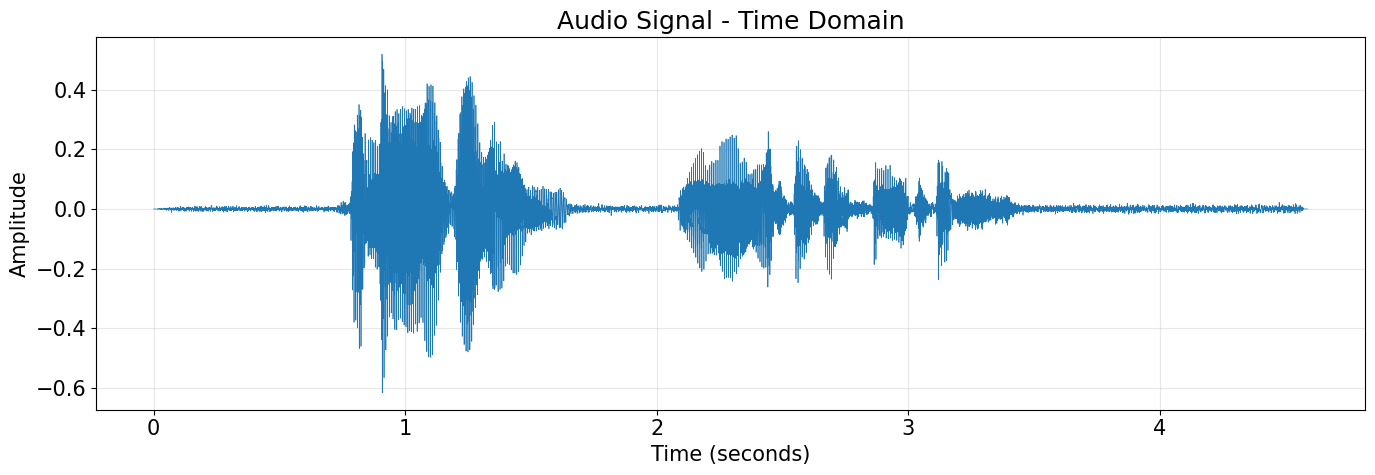

In [ ]:
# Create time axis
time = np.linspace(0, duration, len(audio_data))

# Plot the entire signal
plt.figure(figsize=(14, 5))
plt.plot(time, audio_data, linewidth=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signal - Time Domain')
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('basic_audio_signal_plot.png', dpi=300)
plt.show()

## Basic Signals Operation

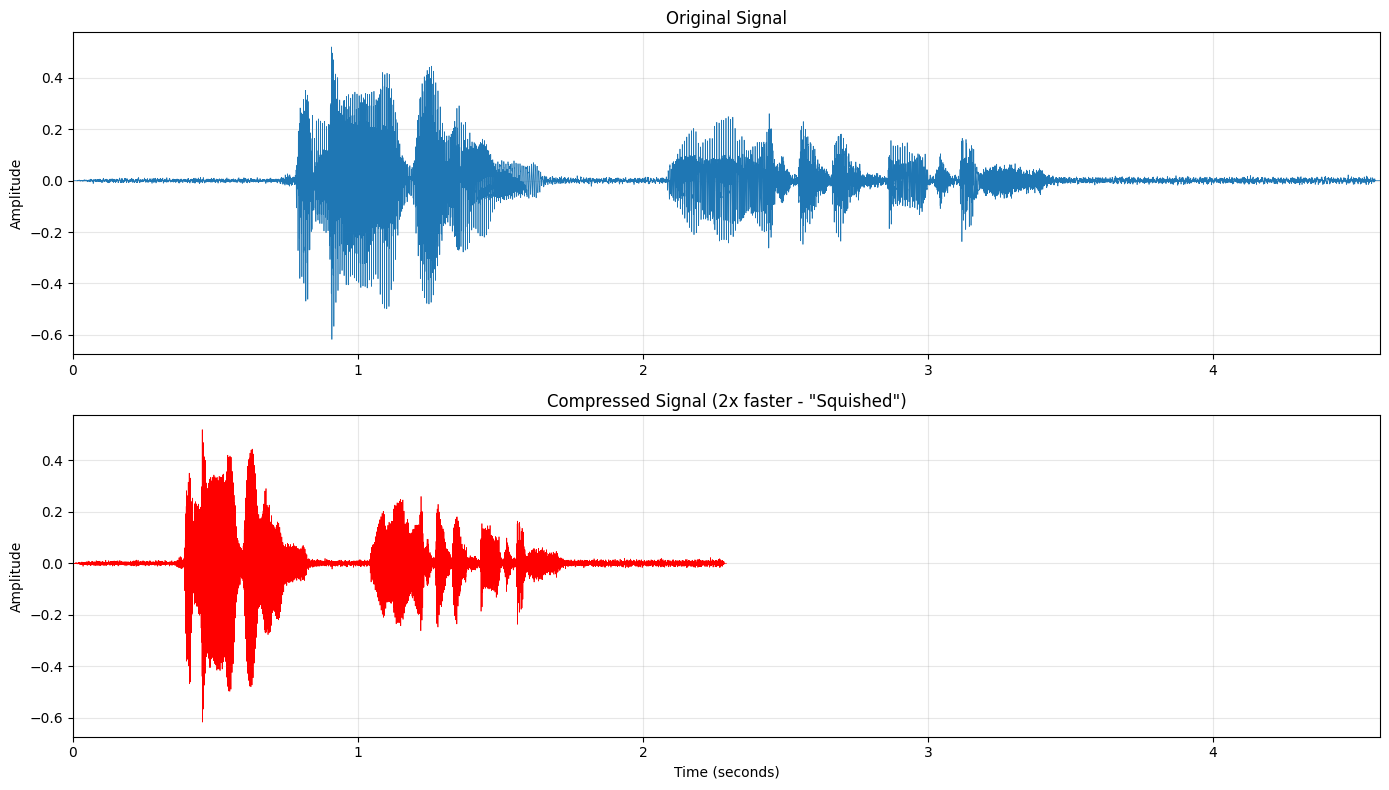

In [14]:
compression_factor = 2 # Can be any number
new_length = int(len(audio_data) / compression_factor)
compressed_audio = signal.resample(audio_data, new_length)

# Create new time axis for compressed signal
compressed_duration = len(compressed_audio) / sample_rate
compressed_time = np.linspace(0, compressed_duration, len(compressed_audio))

# Plot comparison
plt.figure(figsize=(14, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, linewidth=0.5)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlim(0, max(duration, compressed_duration))
plt.grid(True, alpha=0.3)

# Compressed signal
plt.subplot(2, 1, 2)
plt.plot(compressed_time, compressed_audio, linewidth=0.5, color='red')
plt.title(f'Compressed Signal ({compression_factor}x faster - \"Squished\")')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, max(duration, compressed_duration))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
ipd.Audio(compressed_audio, rate=sample_rate)

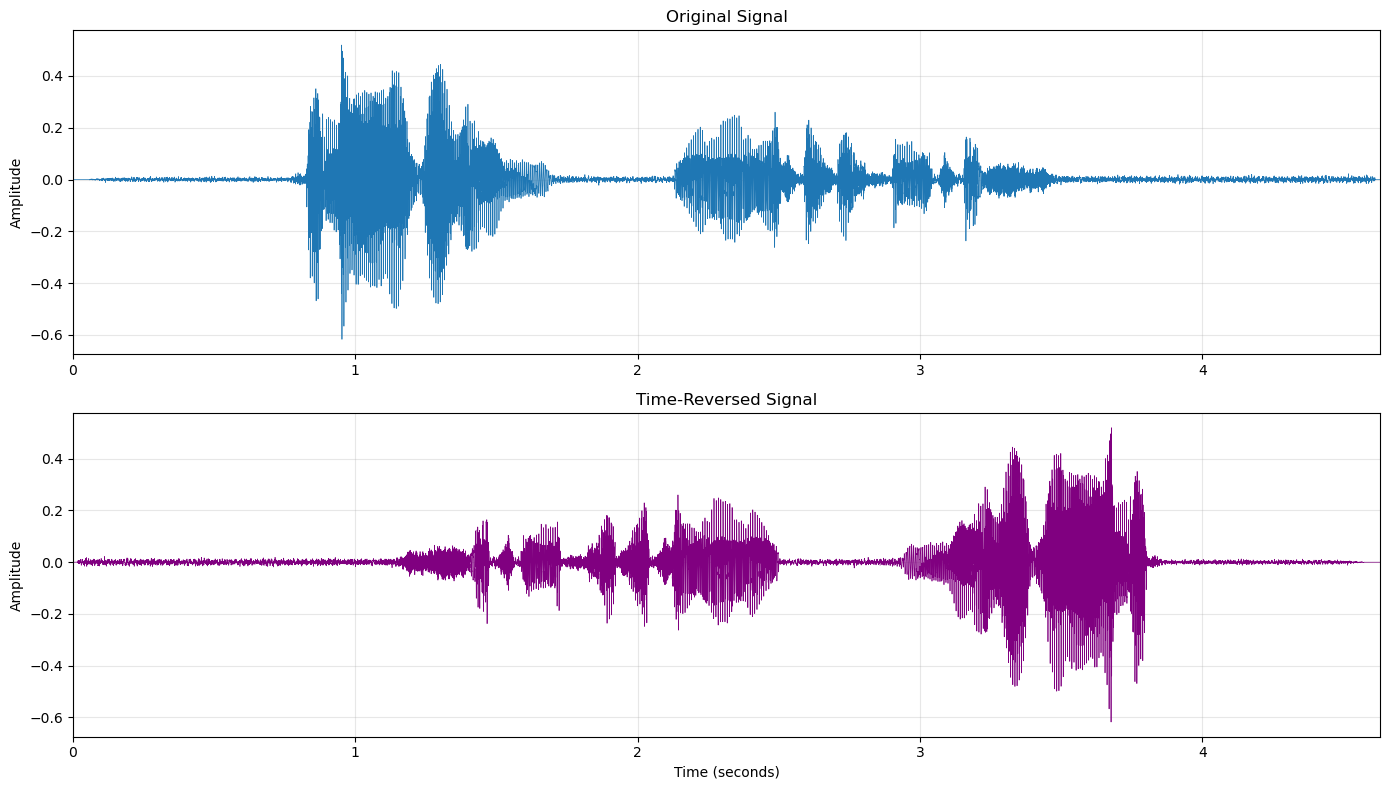

In [ ]:
# Reverse the audio signal
reversed_audio = audio_data[::-1]

# Plot comparison
plt.figure(figsize=(14, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, linewidth=0.5)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlim(0, duration)
plt.grid(True, alpha=0.3)

# Reversed signal
plt.subplot(2, 1, 2)
plt.plot(time, reversed_audio, linewidth=0.5, color='purple')
plt.title('Time-Reversed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, duration)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
ipd.Audio(reversed_audio, rate=sample_rate)